In [1]:
# Import Pandas
import pandas as pd

# Import Mental Health Dataset as csv
df2 = pd.read_csv("../data/raw/Impact_of_Remote_Work_on_Mental_Health.csv")

In [2]:
# Clean Mental Health Dataset

def df_mentalhealth_cleaning(df2):
    #Rename the columns
    df2.columns = df2.columns.str.lower()
    #Creating columns to reflect categories of rating columns
    
    def support_remote_grade(grade):
        if grade <= 2:
            return 'Low'
        if grade == 3:
            return 'Medium'
        else:
            return 'High'
            
    df2['degree_of_remote_support'] = df2['company_support_for_remote_work'].apply(support_remote_grade)
    
    def social_isolation(rating):
        if rating <= 2:
            return 'Low'
        if rating == 3:
            return 'Medium'
        else:
            return 'High'
    df2['degree_of_social_isolation'] = df2['social_isolation_rating'].apply(social_isolation)
    
    def degree_work_life_balance(grade):
        if grade <= 2:
            return 'Low'
        if grade == 3:
            return 'Medium'
        else:
            return 'High'
    df2['degree_of_work-life_balance'] = df2['work_life_balance_rating'].apply(degree_work_life_balance)
    
    #Dropping unneeded columns
    df2 = df2.drop(columns = ['employee_id', 'industry', 'mental_health_condition', 'access_to_mental_health_resources','physical_activity', 'sleep_quality', 'region'])
    #Renaming work_location column
    df2.rename(columns={'work_location': 'work_type'}, inplace = True)
    #Filtering for tech roles
    df_tech = df2[df2["job_role"].isin(['Data Scientist', 'Software Engineer', 'Project Manager'])]

    return df_tech

df2 = df_mentalhealth_cleaning(df2)
df2

,age,gender,job_role,years_of_experience,work_type,hours_worked_per_week,number_of_virtual_meetings,work_life_balance_rating,stress_level,productivity_change,social_isolation_rating,satisfaction_with_remote_work,company_support_for_remote_work,degree_of_remote_support,degree_of_social_isolation,degree_of_work-life_balance
1,40,Female,Data Scientist,3,Remote,52,4,1,Medium,Increase,3,Satisfied,2,Low,Medium,Low
2,59,Non-binary,Software Engineer,22,Hybrid,46,11,5,Medium,No Change,4,Unsatisfied,5,High,High,High
3,27,Male,Software Engineer,20,Onsite,32,8,4,High,Increase,3,Unsatisfied,3,Medium,Medium,High
7,42,Non-binary,Data Scientist,6,Onsite,54,7,3,Medium,Decrease,5,Satisfied,4,High,High,Medium
8,56,Prefer not to say,Data Scientist,9,Hybrid,24,4,2,High,Decrease,2,Unsatisfied,4,High,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,39,Prefer not to say,Software Engineer,11,Hybrid,50,10,3,Low,Decrease,2,Neutral,5,High,Low,Medium
4987,32,Prefer not to say,Software Engineer,9,Hybrid,24,15,2,Medium,No Change,4,Neutral,4,High,High,Low
4990,58,Prefer not to say,Project Manager,10,Onsite,45,10,1,High,Increase,5,Unsatisfied,3,Medium,High,Low
4991,60,Female,Data Scientist,9,Hybrid,57,4,2,Low,Increase,4,Satisfied,5,High,High,Low


In [10]:
# Creating table to show the distribution of employees working in the three different work types for low, medium and high stress levels 

def stress_worktype_rel(df2):
    """
    Displaying correlation between stress levels (low, medium, high) and work type (remote, hybrid, onsite)
    """
    
    df_stress = df2.groupby("stress_level")["work_type"].apply(lambda x: (x.value_counts(normalize=True) * 100))
    df_stress = df_stress.unstack()
    df_stress.columns = ['Remote', 'Hybrid', 'Onsite']
    row_order = ['Low', 'Medium', 'High']
    df_stress = df_stress.loc[row_order]
    df_stress['Total'] = df_stress.sum(axis=1)
    df_stress = df_stress.round({'Remote':2, 'Hybrid':2, 'Onsite':2})
   
    return df_stress

stress_worktype_table = stress_worktype_rel(df2)
stress_worktype_table

,Remote,Hybrid,Onsite,Total
stress_level,,,,
Low,34.26,31.19,34.55,100.0
Medium,31.51,33.56,34.92,100.0
High,31.82,33.74,34.43,100.0


- high stress levels occur more often for employees who work onsite, and least for employees working remotely
- low stress levels can either be found among employees working remotely or onsite

In [9]:
# Creating table to show the distribution of employees working in the three different job types for low, medium and high stress levels 

def stress_jobrole_rel(df2):
    """
    Displaying correlation between stress levels (low, medium, high) and job role (Data Scientist, Project Manager, Software Engineer)
    """
    df_stress = df2.groupby("stress_level")["job_role"].apply(lambda x: (x.value_counts(normalize=True) * 100))
    df_stress = df_stress.unstack()
    row_order = ['Low', 'Medium', 'High']
    df_stress = df_stress.loc[row_order]
    df_stress['Total'] = df_stress.sum(axis=1)
    df_stress = df_stress.round({'Data Scientist':2, 'Project Manager':2, 'Software Engineer':2})
   
    return df_stress

stress_jobrole_table = stress_jobrole_rel(df2)
stress_jobrole_table

,Data Scientist,Project Manager,Software Engineer,Total
stress_level,,,,
Low,33.67,33.38,32.94,100.0
Medium,30.56,35.06,34.38,100.0
High,33.20,34.71,32.10,100.0


- higher stress levels show up more often among project managers, followed by data scientists and least by software engineers
- low stress levels are relatively evenly distributed

In [6]:
# Descriptive statistics for IT jobs grouped by work type

def descriptive_statistics_hours_worked(df2):
    """
    Displaying descriptive statistics (mean, median, min, max) for several separate colums:
    1. hours_worked_per_week
    2. number_of_virtual_meetings
    3. work_life_balance_rating	
    4. company_support_for_remote_work
    """
    
    df_stats_hours_worked = df2.groupby("work_type")[["hours_worked_per_week"]].agg(["mean", "median", "min", "max"]).reset_index()
    df_stats_hours_worked[("hours_worked_per_week", "mean")] = df_stats_hours_worked[("hours_worked_per_week", "mean")].round(2)
    display(df_stats_hours_worked)

    df_stats_virtual_meetings = df2.groupby("work_type")[["number_of_virtual_meetings"]].agg(["mean", "median", "min", "max"]).reset_index()
    df_stats_virtual_meetings[("number_of_virtual_meetings", "mean")] = df_stats_virtual_meetings[("number_of_virtual_meetings", "mean")].round(2)
    display(df_stats_virtual_meetings)

    df_stats_work_life = df2.groupby("work_type")[["work_life_balance_rating"]].agg(["mean", "median", "min", "max"]).reset_index()
    df_stats_work_life[("work_life_balance_rating", "mean")] = df_stats_work_life[("work_life_balance_rating", "mean")].round(2)
    display(df_stats_work_life)

    df_stats_company_support = df2.groupby("work_type")[["company_support_for_remote_work"]].agg(["mean", "median", "min", "max"]).reset_index()
    df_stats_company_support[("company_support_for_remote_work", "mean")] = df_stats_company_support[("company_support_for_remote_work", "mean")].round(2)
    display(df_stats_company_support)
        
    #return df_stats_hours_worked, df_stats_virtual_meetings, df_stats_work_life, df_stats_company_support
    
descriptive_statistics_hours_worked(df2)

work_type hours_worked_per_week               
                             mean median min max
0    Hybrid                 39.84   40.0  20  60
1    Onsite                 39.62   39.0  20  60
2    Remote                 39.72   39.0  20  60

work_type number_of_virtual_meetings               
                                  mean median min max
0    Hybrid                       7.23    7.0   0  15
1    Onsite                       7.78    8.0   0  15
2    Remote                       7.53    7.0   0  15

work_type work_life_balance_rating               
                                mean median min max
0    Hybrid                     3.01    3.0   1   5
1    Onsite                     2.93    3.0   1   5
2    Remote                     3.05    3.0   1   5

work_type company_support_for_remote_work               
                                       mean median min max
0    Hybrid                            3.00    3.0   1   5
1    Onsite                            3.08    3.0   1   5
2    Remote                            3.05    3.0   1   5

- average hours worked per week are highest for hybrid, followed by remote and least for onsite (although very small differences)
- employees working onsite have most virtual meetings, followed by remote and least for hybrid (-> counter-intuitiv)
- employees working remotely show highest work-life-balance rating, followed by hybrid and least for onsite
- company support for remote work is the highest for employees working onsite, followed by remote and least for hybrid (-> counter-intuitiv)

In [3]:
#df_pivot = df2.pivot_table(index="stress_level", columns="work_type", values="work_type), agg=([value_counts(normalize=True) * 100])

def calc_percentage(group):
    return group.value_counts(normalize=True) * 100

# Apply custom function
df_freq = df2.groupby('stress_level')['work_type'].apply(calc_percentage).reset_index(name='percentage')

# Step 2: Pivot table (optional if you want to reshape the result into a matrix format)
df_pivot = df_freq.pivot(index='stress_level', columns='work_type', values='percentage')

# For illustration, fill missing values with 0 to indicate 0% for clarity in presentation (optional)
#df_pivot.fillna(0, inplace=True)

print(df_pivot)

KeyError: 'work_type'

In [8]:
# Try to plot
import seaborn as sns
import matplotlib.pyplot as plt

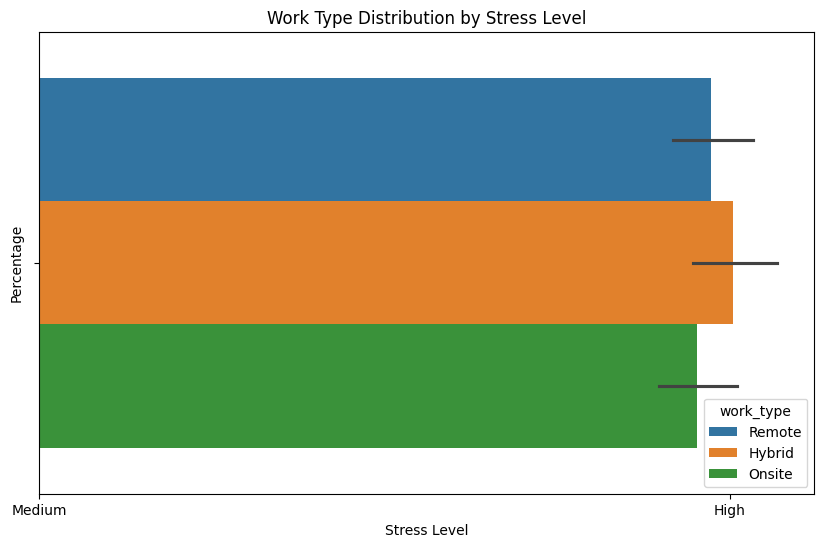

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df2, x='stress_level', hue='work_type')
plt.title('Work Type Distribution by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Percentage')
plt.show()

In [8]:
# Descriptive statistics for IT jobs grouped by work location using plotly
import plotly.graph_objects as go

def descriptive_statistics_it(df2):
    df_stats = df2.groupby("work_type")[["hours_worked_per_week"]].agg(["mean", "median", "min", "max"]).reset_index()
    df_stats[("hours_worked_per_week", "mean")] = df_stats[("hours_worked_per_week", "mean")].round(2)
    df_stats[("number_of_virtual_meetings", "mean")] = df_stats[("number_of_virtual_meetings", "mean")].round(2)
    fig = go.Figure(data=[go.Table(
        header=dict(values=list(df_stats.columns)),
        cells=dict(values=[df_stats[col] for col in df_stats.columns])
    )])
    fig.show()
    pd.set_option('display.max_columns', None)
    return df_stats
    
descriptive_statistics_it(df2)

KeyError: ('number_of_virtual_meetings', 'mean')